In [87]:
pip install scikeras

In [88]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#importing libraries

import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [89]:
df = pdr.get_data_tiingo('AAPL', api_key = 'paste your key in') #getting stock data values over time using tiingo (note: one needs autentivation key whihc one can get for free ny login to tiingo)

In [90]:
df.to_csv('AAPL.csv') #converting extracted data to csv

In [91]:
df = pd.read_csv('NVDA.csv') #reading extracted data using python

In [92]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,NVDA,2019-01-25 00:00:00+00:00,160.15,160.88,151.30,155.44,28880547,39.726382,39.907464,37.531075,38.558032,115522188,0.0,1.0
1,NVDA,2019-01-28 00:00:00+00:00,138.01,141.64,131.00,136.55,62788169,34.234393,35.134841,32.495511,33.872229,251152676,0.0,1.0
2,NVDA,2019-01-29 00:00:00+00:00,131.60,138.10,131.01,136.15,28848347,32.644345,34.256718,32.497991,33.773006,115393388,0.0,1.0
3,NVDA,2019-01-30 00:00:00+00:00,137.39,137.97,131.46,134.67,24355739,34.080597,34.224470,32.609617,33.405881,97422956,0.0,1.0
4,NVDA,2019-01-31 00:00:00+00:00,143.75,145.19,136.38,137.26,21071338,35.658242,36.015444,33.830059,34.048350,84285352,0.0,1.0


In [93]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,NVDA,2024-01-17 00:00:00+00:00,560.53,564.7068,547.40,563.47,47439444,560.53,564.7068,547.40,563.47,47439444,0.0,1.0
1253,NVDA,2024-01-18 00:00:00+00:00,571.07,576.0000,561.07,572.60,49165036,571.07,576.0000,561.07,572.60,49165036,0.0,1.0
1254,NVDA,2024-01-19 00:00:00+00:00,594.91,595.0000,572.25,579.89,54350148,594.91,595.0000,572.25,579.89,54350148,0.0,1.0
1255,NVDA,2024-01-22 00:00:00+00:00,596.54,603.3100,590.70,600.49,45295463,596.54,603.3100,590.70,600.49,45295463,0.0,1.0
1256,NVDA,2024-01-23 00:00:00+00:00,598.73,599.1000,585.85,595.70,29465445,598.73,599.1000,585.85,595.70,29465445,0.0,1.0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [95]:
length_data = len(df)     # rows that data has
split_ratio = 0.8         # %80 train + %20 validation
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1257
Train data length : 1006
Validation data lenth : 251


In [96]:
train_data = df[:length_train].iloc[:,1:3]
train_data['date'] = pd.to_datetime(train_data['date'])  # converting to date time object
train_data

,date,close
0,2019-01-25 00:00:00+00:00,160.15
1,2019-01-28 00:00:00+00:00,138.01
2,2019-01-29 00:00:00+00:00,131.60
3,2019-01-30 00:00:00+00:00,137.39
4,2019-01-31 00:00:00+00:00,143.75
...,...,...
1001,2023-01-17 00:00:00+00:00,177.02
1002,2023-01-18 00:00:00+00:00,173.77
1003,2023-01-19 00:00:00+00:00,167.65
1004,2023-01-20 00:00:00+00:00,178.39


In [97]:
validation_data = df[length_train:].iloc[:,1:3]
validation_data['date'] = pd.to_datetime(validation_data['date'])  # converting to date time object
validation_data

,date,close
1006,2023-01-24 00:00:00+00:00,192.65
1007,2023-01-25 00:00:00+00:00,193.23
1008,2023-01-26 00:00:00+00:00,198.02
1009,2023-01-27 00:00:00+00:00,203.65
1010,2023-01-30 00:00:00+00:00,191.62
...,...,...
1252,2024-01-17 00:00:00+00:00,560.53
1253,2024-01-18 00:00:00+00:00,571.07
1254,2024-01-19 00:00:00+00:00,594.91
1255,2024-01-22 00:00:00+00:00,596.54


In [98]:
dataset_train = train_data.close.values
dataset_train.shape

(1006,)

In [99]:
# Change 1d array to 2d array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1006, 1)

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1006, 1)

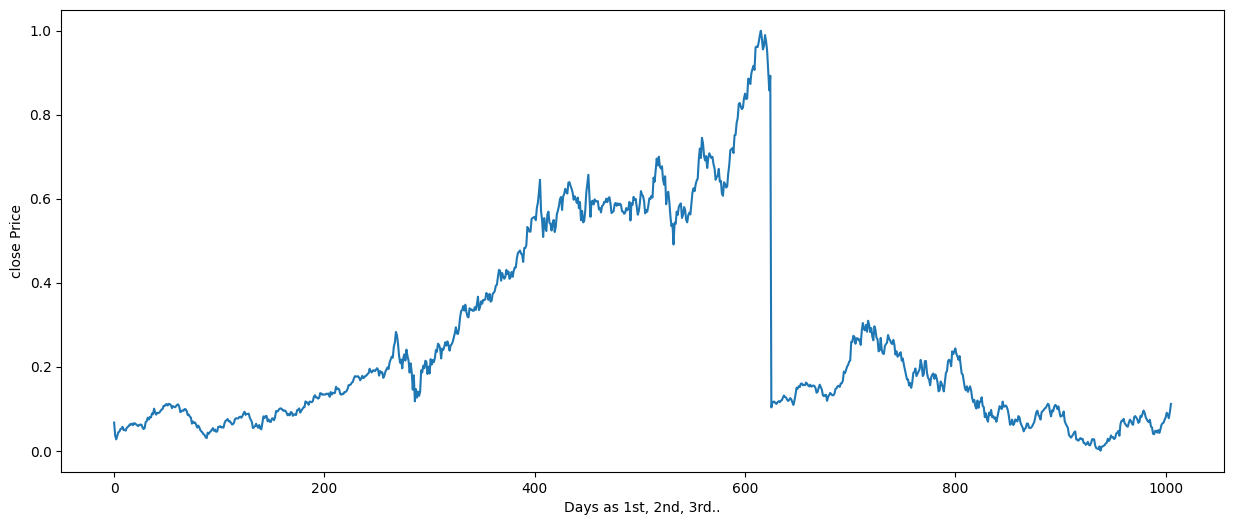

In [101]:
#closing stock prices over days
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("close Price")
plt.show()

In [102]:
#separating the total dataset into train dataset and test/validation dataset
X_train = []
y_train = []

time_step = 100

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [103]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (906, 100)
Shape of y_train before reshape : (906,)


In [104]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (906, 100)
Shape of y_train after reshape : (906, 1)


In [105]:
X_train[0]

array([0.06690234, 0.0359663 , 0.02700966, 0.03509998, 0.04398675,
       0.0453561 , 0.05157405, 0.05264996, 0.05691171, 0.04911482,
       0.05016278, 0.04775944, 0.05435466, 0.05674403, 0.05904956,
       0.06297595, 0.06199785, 0.06466668, 0.0607822 , 0.06556094,
       0.0648623 , 0.0626406 , 0.06027918, 0.05867229, 0.06173236,
       0.06219347, 0.06183017, 0.05558428, 0.05168583, 0.0536141 ,
       0.06828566, 0.07021393, 0.07873741, 0.07446169, 0.08040018,
       0.07919851, 0.08864421, 0.08681375, 0.10014392, 0.09114536,
       0.08594743, 0.09026507, 0.08974807, 0.09079604, 0.09402378,
       0.09782442, 0.09883047, 0.10668325, 0.10618022, 0.10993894,
       0.11111266, 0.10757751, 0.11154582, 0.11076334, 0.10862548,
       0.10120586, 0.10611036, 0.10482485, 0.10344153, 0.10647365,
       0.1095477 , 0.11024634, 0.10429388, 0.09196976, 0.0937024 ,
       0.09603588, 0.09529532, 0.09909595, 0.09884444, 0.094429  ,
       0.08501125, 0.08614305, 0.08093116, 0.07901687, 0.06452

In [106]:
y_train.shape[0]

906

In [107]:
from tensorflow.keras.optimizers import Adam

In [109]:
mlp = MLPRegressor()

# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': [(50,), (100,), (200,)], 'alpha': [0.1, 0.5, 1], 'learning_rate': ['constant', 'invscaling', 'adaptive']}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best hyperparameters:  {'alpha': 0.1, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant'}
Best: -0.003117 using {'alpha': 0.1, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant'}


In [110]:
svm = SVR()

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 0.5, 1]}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: -0.024066 using {'C': 10, 'epsilon': 0.1}


In [111]:
xgb = XGBRegressor()

# Define the hyperparameter grid
param_grid = {'learning_rate': [0.1, 0.5, 1], 'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: -0.004463 using {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50}


In [112]:
from keras.layers import LSTM

In [125]:
# Define the LSTM model
def create_model():

    model = Sequential()
    model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create the LSTM model
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32)

# Define the hyperparameter grid
param_grid = {'batch_size': [16, 32, 64], 'epochs': [50, 100, 200]}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Streaming output truncated to the last 5000 lines.
23/23 [==============================] - 0s 3ms/step - loss: 2.0381e-04
Epoch 61/200
23/23 [==============================] - 0s 3ms/step - loss: 2.2000e-04
Epoch 62/200
23/23 [==============================] - 0s 3ms/step - loss: 2.2900e-04
Epoch 63/200
23/23 [==============================] - 0s 3ms/step - loss: 2.1473e-04
Epoch 64/200
23/23 [==============================] - 0s 3ms/step - loss: 2.5985e-04
Epoch 65/200
23/23 [==============================] - 0s 3ms/step - loss: 2.1092e-04
Epoch 66/200
23/23 [==============================] - 0s 3ms/step - loss: 2.5190e-04
Epoch 67/200
23/23 [==============================] - 0s 3ms/step - loss: 2.1116e-04
Epoch 68/200
23/23 [==============================] - 0s 3ms/step - loss: 1.9435e-04
Epoch 69/200
23/23 [==============================] - 0s 3ms/step - loss: 1.9375e-04
Epoch 70/200
23/23 [==============================] - 0s 3ms/step - loss: 2.0734e-04
Epoch 71/200
23/23 [=======